In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('./dataset/Ventas_Minoristas.xlsx')

df.head()

,ID_cliente,Nombre_producto,Cantidad,Precio_unitario(USD),Fecha,categoria,pais,ciudad,metodo_pago,edad_cliente,genero_cliente,calificación_satisfaccion
0,1,Reloj,5,512.56,2024-06-02 18:49:13.249,Accesorios,Argentina,Buenos Aires,Efectivo,31,Femenino,3
1,2,Televisor,1,307.40,2023-12-11 18:49:13.249,Electrónica,Argentina,Buenos Aires,Efectivo,29,Masculino,2
2,3,Laptop,9,554.01,2024-03-31 18:49:13.249,Electrónica,España,Madrid,PayPal,40,Masculino,2
3,4,Jeans,4,931.51,2024-02-24 18:49:13.249,Ropa,México,Ciudad de México,Efectivo,60,Masculino,1
4,5,Audífonos,6,525.55,2023-11-29 18:49:13.249,Accesorios,Perú,Lima,Tarjeta de crédito,57,Masculino,5


In [6]:
df.describe()

,ID_cliente,Cantidad,Precio_unitario(USD),Fecha,edad_cliente,calificación_satisfaccion
count,500.000000,500.00000,500.000000,500,500.000000,500.000000
mean,250.500000,4.93600,506.128560,2024-04-05 10:56:54.050656,43.008000,2.970000
min,1.000000,1.00000,10.540000,2023-10-06 18:49:13.250000,18.000000,1.000000
25%,125.750000,3.00000,257.220000,2023-12-31 12:49:13.249250048,30.000000,2.000000
50%,250.500000,5.00000,490.765000,2024-03-31 18:49:13.249499904,42.000000,3.000000
75%,375.250000,7.00000,775.417500,2024-07-10 06:49:13.249749760,56.000000,4.000000
max,500.000000,9.00000,999.810000,2024-10-04 18:49:13.251000,69.000000,5.000000
std,144.481833,2.49968,292.818228,NaN,15.086389,1.404652


In [7]:
df.dtypes

ID_cliente                            int64
Nombre_producto                      object
Cantidad                              int64
Precio_unitario(USD)                float64
Fecha                        datetime64[ns]
categoria                            object
pais                                 object
ciudad                               object
metodo_pago                          object
edad_cliente                          int64
genero_cliente                       object
calificación_satisfaccion             int64
dtype: object

In [11]:
df.columns = ['id_cliente', 'nombre_producto', 'cantidad', 'precio_unitario',
       'fecha', 'categoria', 'pais', 'ciudad', 'metodo_pago', 'edad_cliente',
       'genero_cliente', 'calificacion_satisfaccion']

df.head()

,id_cliente,nombre_producto,cantidad,precio_unitario,fecha,categoria,pais,ciudad,metodo_pago,edad_cliente,genero_cliente,calificacion_satisfaccion
0,1,Reloj,5,512.56,2024-06-02 18:49:13.249,Accesorios,Argentina,Buenos Aires,Efectivo,31,Femenino,3
1,2,Televisor,1,307.40,2023-12-11 18:49:13.249,Electrónica,Argentina,Buenos Aires,Efectivo,29,Masculino,2
2,3,Laptop,9,554.01,2024-03-31 18:49:13.249,Electrónica,España,Madrid,PayPal,40,Masculino,2
3,4,Jeans,4,931.51,2024-02-24 18:49:13.249,Ropa,México,Ciudad de México,Efectivo,60,Masculino,1
4,5,Audífonos,6,525.55,2023-11-29 18:49:13.249,Accesorios,Perú,Lima,Tarjeta de crédito,57,Masculino,5


In [13]:
df['venta_total'] = df['precio_unitario'] * df['cantidad']

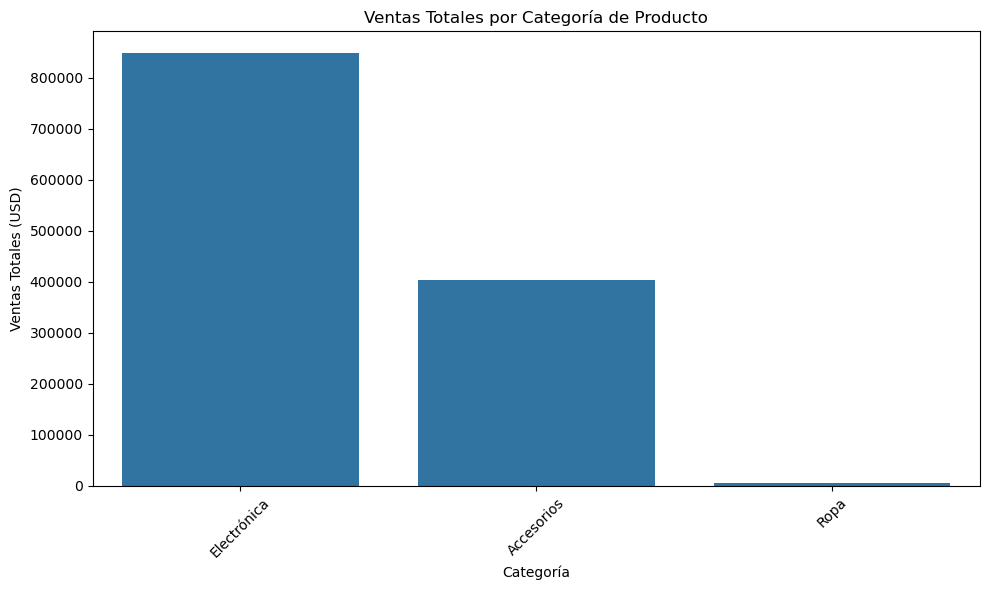

In [18]:
ventas_por_categoria = df.groupby('categoria')['venta_total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values)
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

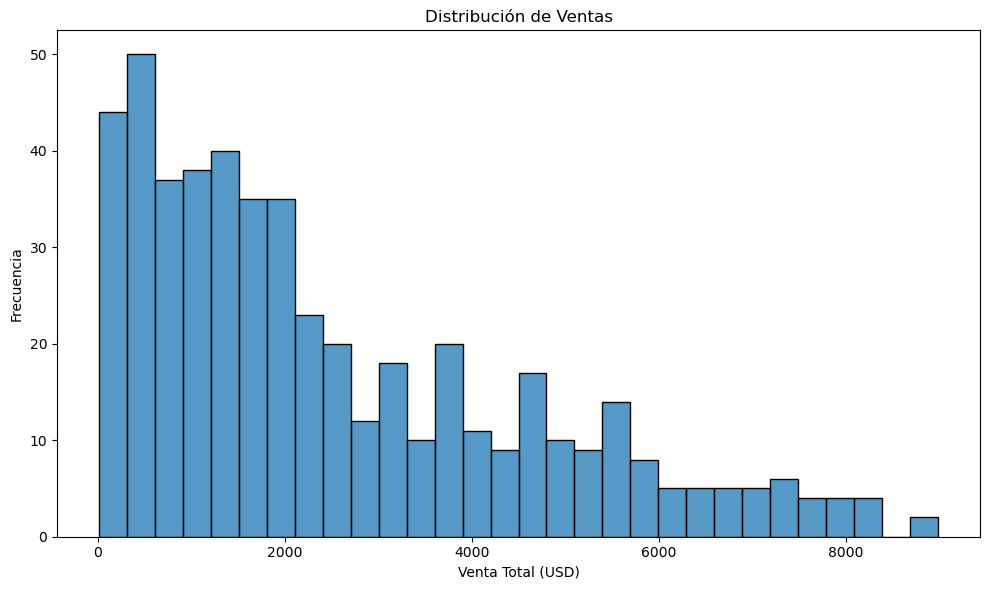

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='venta_total', bins=30)
plt.title('Distribución de Ventas')
plt.xlabel('Venta Total (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


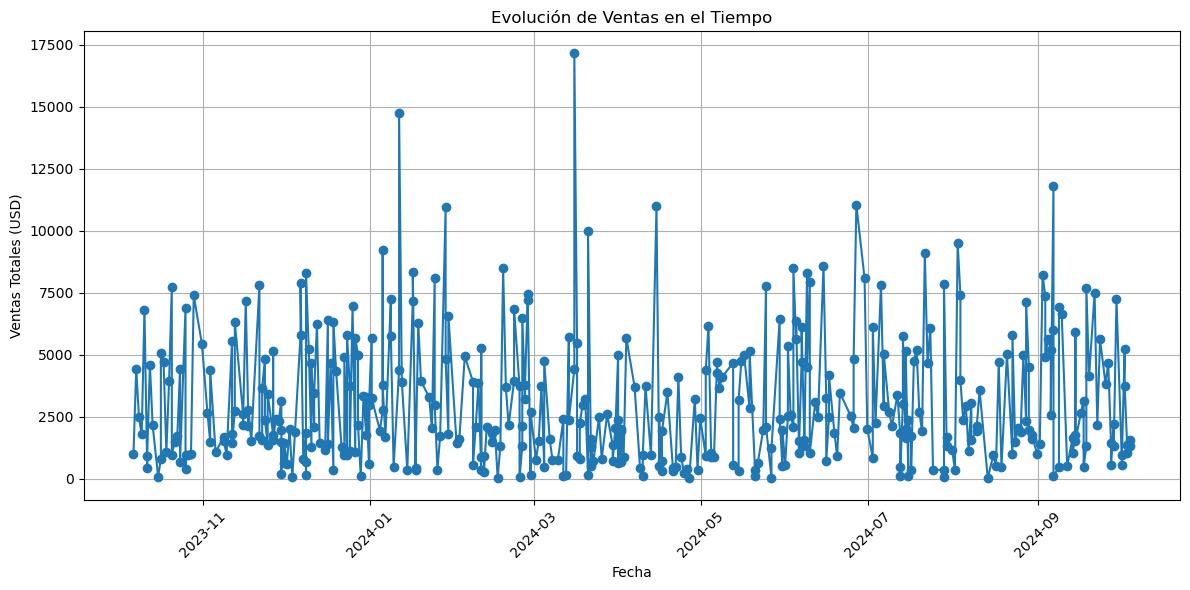

In [20]:
ventas_por_fecha = df.groupby('fecha')['venta_total'].sum().reset_index()
ventas_por_fecha = ventas_por_fecha.sort_values('fecha')

plt.figure(figsize=(12, 6))
plt.plot(ventas_por_fecha['fecha'], ventas_por_fecha['venta_total'], marker='o')
plt.title('Evolución de Ventas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


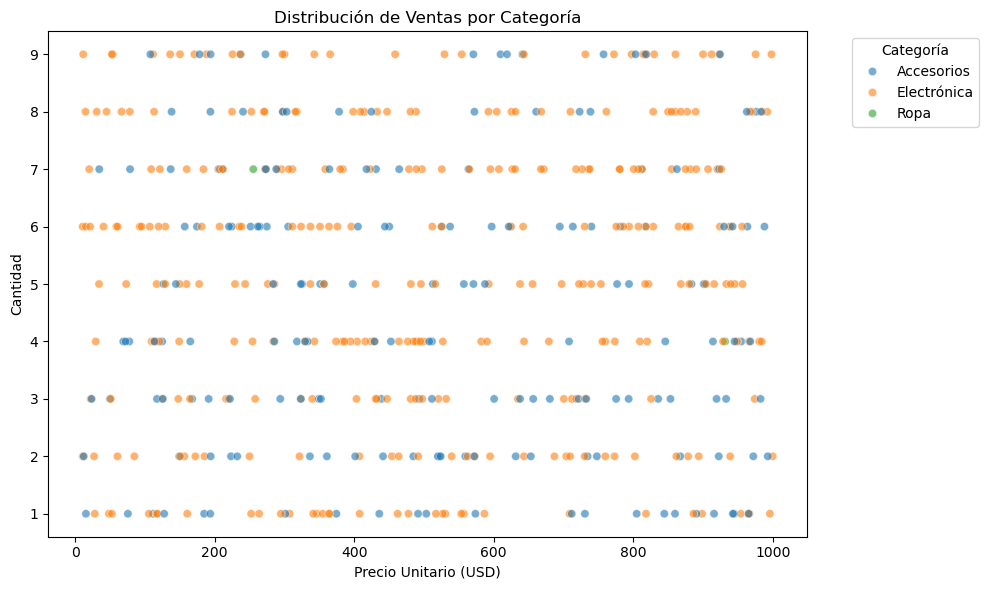

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='precio_unitario', y='cantidad', hue='categoria', alpha=0.6)
plt.title('Distribución de Ventas por Categoría')
plt.xlabel('Precio Unitario (USD)')
plt.ylabel('Cantidad')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
df_city = pd.read_csv('./dataset/worldcities.csv')

df_city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,Tōkyō,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [58]:
df_city = df_city[['city', 'country', 'lat', 'lng']]

df_city.head()

,city,country,lat,lng
0,Tokyo,Japan,35.6870,139.7495
1,Jakarta,Indonesia,-6.1750,106.8275
2,Delhi,India,28.6100,77.2300
3,Guangzhou,China,23.1300,113.2600
4,Mumbai,India,19.0761,72.8775


In [68]:
df_city['country'] = df_city['country'].replace('Spain', 'España')
df_city['country'] = df_city['country'].replace('Mexico', 'México')
df_city['country'] = df_city['country'].replace('Peru', 'Perú')
df_city['city'] = df_city['city'].replace('Mexico City', 'Ciudad de México')


In [69]:
df_city['lat'] = df_city['lat'].astype(float)
df_city['lng'] = df_city['lng'].astype(float)

df_city.head()

,city,country,lat,lng
0,Tokyo,Japan,35.6870,139.7495
1,Jakarta,Indonesia,-6.1750,106.8275
2,Delhi,India,28.6100,77.2300
3,Guangzhou,China,23.1300,113.2600
4,Mumbai,India,19.0761,72.8775


In [70]:
df.head()

,id_cliente,nombre_producto,cantidad,precio_unitario,fecha,categoria,pais,ciudad,metodo_pago,edad_cliente,genero_cliente,calificacion_satisfaccion,venta_total
0,1,Reloj,5,512.56,2024-06-02 18:49:13.249,Accesorios,Argentina,Buenos Aires,Efectivo,31,Femenino,3,2562.80
1,2,Televisor,1,307.40,2023-12-11 18:49:13.249,Electrónica,Argentina,Buenos Aires,Efectivo,29,Masculino,2,307.40
2,3,Laptop,9,554.01,2024-03-31 18:49:13.249,Electrónica,España,Madrid,PayPal,40,Masculino,2,4986.09
3,4,Jeans,4,931.51,2024-02-24 18:49:13.249,Ropa,México,Ciudad de México,Efectivo,60,Masculino,1,3726.04
4,5,Audífonos,6,525.55,2023-11-29 18:49:13.249,Accesorios,Perú,Lima,Tarjeta de crédito,57,Masculino,5,3153.30


In [71]:
df_city[df_city['country'] == 'México']


,city,country,lat,lng
9,Ciudad de México,México,19.4333,-99.1333
112,Guadalajara,México,20.6767,-103.3475
117,Monterrey,México,25.6844,-100.3181
332,Toluca,México,19.2925,-99.6569
414,Tijuana,México,32.5250,-117.0333
...,...,...,...,...
47144,Nautla,México,20.2167,-96.7833
47283,Altata,México,24.6333,-107.9167
47448,Mazatán,México,29.0167,-110.1333
47730,Punta Prieta,México,28.9289,-114.1556


In [72]:
# make join between df and df_city by ciudad = city and pais = country
df_join = pd.merge(df, df_city, left_on=['ciudad', 'pais'], right_on=['city', 'country'], how='left')

df_join.head()

,id_cliente,nombre_producto,cantidad,precio_unitario,fecha,categoria,pais,ciudad,metodo_pago,edad_cliente,genero_cliente,calificacion_satisfaccion,venta_total,city,country,lat,lng
0,1,Reloj,5,512.56,2024-06-02 18:49:13.249,Accesorios,Argentina,Buenos Aires,Efectivo,31,Femenino,3,2562.80,Buenos Aires,Argentina,-34.6036,-58.3814
1,2,Televisor,1,307.40,2023-12-11 18:49:13.249,Electrónica,Argentina,Buenos Aires,Efectivo,29,Masculino,2,307.40,Buenos Aires,Argentina,-34.6036,-58.3814
2,3,Laptop,9,554.01,2024-03-31 18:49:13.249,Electrónica,España,Madrid,PayPal,40,Masculino,2,4986.09,Madrid,España,40.4169,-3.7033
3,4,Jeans,4,931.51,2024-02-24 18:49:13.249,Ropa,México,Ciudad de México,Efectivo,60,Masculino,1,3726.04,Ciudad de México,México,19.4333,-99.1333
4,5,Audífonos,6,525.55,2023-11-29 18:49:13.249,Accesorios,Perú,Lima,Tarjeta de crédito,57,Masculino,5,3153.30,Lima,Perú,-12.0600,-77.0375


In [73]:
# Obtener las filas de df_join donde city es null
df_null = df_join[df_join['city'].isnull()]
df_null= df_null[['ciudad', 'pais']]

In [74]:
df_null.drop_duplicates(subset=['pais', 'ciudad'])

,ciudad,pais
